### Set up

Upload your kaggle.json API token file(You can get it from your accounts page)

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"zotako","key":"cd7d7e8bbf688035e9cbe2ac09c40e5f"}'}

In [ ]:
!pip3 install geopandas

In [ ]:
!pip install cartopy

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip3 install mplleaflet

In [ ]:
import mplleaflet as mpll

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16965  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10256  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4747  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3731  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles

uk-road-safety-accidents-and-vehicles.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir train
! unzip uk-road-safety-accidents-and-vehicles.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  uk-road-safety-accidents-and-vehicles.zip
replace train/Accident_Information.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/Vehicle_Information.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import os
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train/Vehicle_Information.csv
train/Accident_Information.csv


In [ ]:
accidents=pd.read_csv("train/Accident_Information.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Initial plots

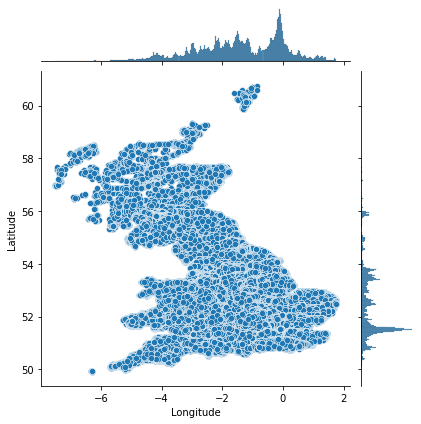

In [ ]:
sns.jointplot(x="Longitude", y="Latitude", data=accidents);

In [ ]:
accidents['Local_Authority_(Highway)'].value_counts().to_frame().head(50)

,Local_Authority_(Highway)
Kent,57801
Surrey,52676
Lancashire,44968
Essex,44161
Hampshire,41600
Birmingham,39662
Hertfordshire,37419
Staffordshire,31083
Lincolnshire,29606
Nottinghamshire,27488


In [ ]:
accidents.dropna(subset=['Latitude','Longitude'], inplace=True)

In [ ]:
accidents.shape

(2047081, 34)

KDE Plot of East Sussex for the year 2005

In [ ]:
sus_acc = accidents.loc[accidents['Local_Authority_(Highway)'] == 'East Sussex']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


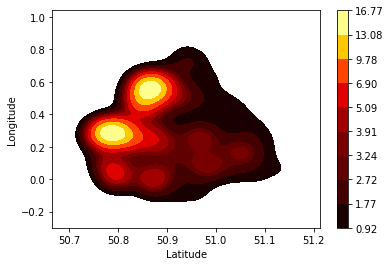

In [ ]:
df = sus_acc[sus_acc['Year']==2005]
ground = sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', cbar=True);

### Weighted

In [ ]:
accidents.loc[accidents['Accident_Severity'] == 'Fatal', 'w1'] = 81
accidents.loc[accidents['Accident_Severity'] == 'Serious', 'w1'] = 16
accidents.loc[accidents['Accident_Severity'] == 'Slight', 'w1'] = 1

**East Sussex KDE Plot**

In [ ]:
sus_acc = accidents.loc[accidents['Local_Authority_(Highway)'] == 'East Sussex']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


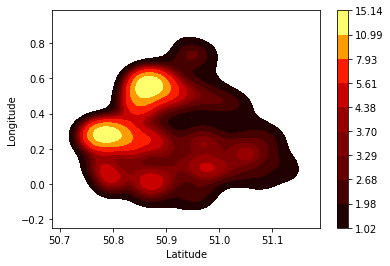

In [ ]:
sns.kdeplot(sus_acc['Latitude'], sus_acc['Longitude'], shade=True, cmap='hot', weights=sus_acc['w1'], cbar=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


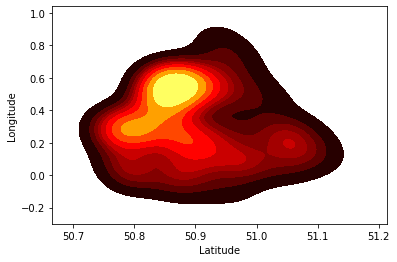

In [ ]:
df = sus_acc[sus_acc['Year']==2005]
sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']);

Converting KDE Plot of East Sussex for past 13 years into a GIF

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

NameError: ignored

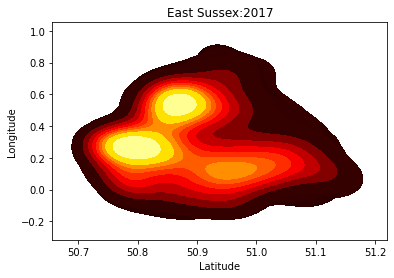

In [ ]:
import matplotlib.pyplot as plt
import imageio
# fig, axes = plt.subplots(13,1, figsize=(10, 65))
filenames = []
for i in range(0,13):
  df = sus_acc[sus_acc['Year']==(i+2005)]
  splot=sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']).set_title("East Sussex:{}".format(i+2005));
  fig=splot.get_figure()
  filename = f'{i}.png'
  filenames.append(filename)
  fig.savefig(filename)
frames=[]
for filename in filenames:
    frames.append(imageio.imread(filename))
      # writer.append_data(image)
imageio.mimsave('sussexplot.gif',frames,'GIF',duration=0.5)
for filename in set(filenames):
    os.remove(filename)

**Hampshire KDE Plot**

In [ ]:
ham_acc = accidents.loc[accidents['Local_Authority_(Highway)'] == 'Hampshire']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = ham_acc[ham_acc['Year']==2005]
sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']);

Converting KDE Plot of Hampshire for past 13 years into a GIF

In [ ]:
import matplotlib.pyplot as plt
import imageio
# fig, axes = plt.subplots(13,1, figsize=(10, 65))
filenames = []
for i in range(0,13):
  df = ham_acc[ham_acc['Year']==(i+2005)]
  splot=sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']).set_title("Hampshire:{}".format(i+2005));
  fig=splot.get_figure()
  filename = f'{i}.png'
  filenames.append(filename)
  fig.savefig(filename)
frames=[]
for filename in filenames:
    frames.append(imageio.imread(filename))
      # writer.append_data(image)
imageio.mimsave('hampshireplot.gif',frames,'GIF',duration=0.5)
for filename in set(filenames):
    os.remove(filename)

### Set up for RF and SVM


In [ ]:
acc = pd.read_csv("train/Accident_Information.csv")
acc.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [ ]:
veh = pd.read_csv("train/Vehicle_Information.csv", encoding='ISO-8859-1')
acc.shape

(2047256, 34)

In [ ]:
df = pd.merge(accidents, veh, how = 'inner', on = 'Accident_Index' )
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',


In [ ]:
df = df[['1st_Road_Class', 'Junction_Detail', "Accident_Index", 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week','Latitude', 'Light_Conditions',  'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x','Age_Band_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Skidding_and_Overturning',  'Vehicle_Type', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway']]

In [ ]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058283 entries, 0 to 2058282
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   1st_Road_Class              object 
 1   Junction_Detail             object 
 2   Accident_Index              object 
 3   Accident_Severity           object 
 4   Carriageway_Hazards         object 
 5   Date                        object 
 6   Day_of_Week                 object 
 7   Latitude                    float64
 8   Light_Conditions            object 
 9   Longitude                   float64
 10  LSOA_of_Accident_Location   object 
 11  Number_of_Casualties        int64  
 12  Number_of_Vehicles          int64  
 13  Road_Surface_Conditions     object 
 14  Road_Type                   object 
 15  Special_Conditions_at_Site  object 
 16  Speed_limit                 float64
 17  Time                        object 
 18  Urban_or_Rural_Area         object 
 19  Weather_Conditions   

### Models 
- Classifying attribute information according to severity 
- Predicting severity of a location using severity index

### Preprocessing

In [ ]:
df.isnull().sum()

1st_Road_Class                     0
Junction_Detail                    0
Accident_Index                     0
Accident_Severity                  0
Carriageway_Hazards                0
Date                               0
Day_of_Week                        0
Latitude                           0
Light_Conditions                   0
Longitude                          0
LSOA_of_Accident_Location     139088
Number_of_Casualties               0
Number_of_Vehicles                 0
Road_Surface_Conditions            0
Road_Type                          0
Special_Conditions_at_Site         0
Speed_limit                       65
Time                             146
Urban_or_Rural_Area                0
Weather_Conditions                 0
Year_x                             0
Age_Band_of_Driver                 0
Age_of_Vehicle                337919
Engine_Capacity_.CC.          250283
Skidding_and_Overturning           0
Vehicle_Type                       0
Hit_Object_in_Carriageway          0
H

In [ ]:
df.dropna(how='any', inplace=True)
df.shape

(1588313, 28)

In [ ]:
df.isnull().sum()

1st_Road_Class                0
Junction_Detail               0
Accident_Index                0
Accident_Severity             0
Carriageway_Hazards           0
Date                          0
Day_of_Week                   0
Latitude                      0
Light_Conditions              0
Longitude                     0
LSOA_of_Accident_Location     0
Number_of_Casualties          0
Number_of_Vehicles            0
Road_Surface_Conditions       0
Road_Type                     0
Special_Conditions_at_Site    0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Year_x                        0
Age_Band_of_Driver            0
Age_of_Vehicle                0
Engine_Capacity_.CC.          0
Skidding_and_Overturning      0
Vehicle_Type                  0
Hit_Object_in_Carriageway     0
Hit_Object_off_Carriageway    0
dtype: int64

In [ ]:
df2 = df[['Time', 'Day_of_Week', 'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 
          'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_of_Vehicle', 'Engine_Capacity_.CC.',
          'Skidding_and_Overturning', 'Hit_Object_in_Carriageway','Hit_Object_off_Carriageway','Accident_Severity']]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588313 entries, 0 to 2043551
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Time                        1588313 non-null  object 
 1   Day_of_Week                 1588313 non-null  object 
 2   Light_Conditions            1588313 non-null  object 
 3   Number_of_Casualties        1588313 non-null  int64  
 4   Number_of_Vehicles          1588313 non-null  int64  
 5   Road_Surface_Conditions     1588313 non-null  object 
 6   Road_Type                   1588313 non-null  object 
 7   Speed_limit                 1588313 non-null  float64
 8   Urban_or_Rural_Area         1588313 non-null  object 
 9   Weather_Conditions          1588313 non-null  object 
 10  Age_of_Vehicle              1588313 non-null  float64
 11  Engine_Capacity_.CC.        1588313 non-null  float64
 12  Skidding_and_Overturning    1588313 non-null  object 
 1

Encoding categorical values to numerical values

In [ ]:
df2['Hour']=df2['Time'].str[0:2]
df2=df2.dropna(subset=['Hour'])
df2['Hour']=pd.to_numeric(df2['Hour'])
def converthrstocategory(hrs):
    if(hrs<6):
        return 1
    elif(hrs>=6 and hrs<11):
        return 2
    elif(hrs>=11 and hrs<16):
        return 3
    elif(hrs>=16 and hrs<20):
        return 4
    elif(hrs>=20 and hrs<=23):
        return 5
df2['Hrs_category']=df2['Hour'].apply(converthrstocategory)
df2['Hrs_category']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          4
1          1
2          2
3          5
4          3
          ..
2043543    3
2043544    3
2043546    2
2043548    1
2043551    4
Name: Hrs_category, Length: 1588313, dtype: int64

In [ ]:
df2.drop(['Time','Hour'], axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588313 entries, 0 to 2043551
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Day_of_Week                 1588313 non-null  object 
 1   Light_Conditions            1588313 non-null  object 
 2   Number_of_Casualties        1588313 non-null  int64  
 3   Number_of_Vehicles          1588313 non-null  int64  
 4   Road_Surface_Conditions     1588313 non-null  object 
 5   Road_Type                   1588313 non-null  object 
 6   Speed_limit                 1588313 non-null  float64
 7   Urban_or_Rural_Area         1588313 non-null  object 
 8   Weather_Conditions          1588313 non-null  object 
 9   Age_of_Vehicle              1588313 non-null  float64
 10  Engine_Capacity_.CC.        1588313 non-null  float64
 11  Skidding_and_Overturning    1588313 non-null  object 
 12  Hit_Object_in_Carriageway   1588313 non-null  object 
 1

In [ ]:
for i in ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type', 
          'Urban_or_Rural_Area', 'Weather_Conditions', 
          'Skidding_and_Overturning', 'Hit_Object_in_Carriageway','Hit_Object_off_Carriageway']:
          df2[i] = df2[i].astype('category')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588313 entries, 0 to 2043551
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   Day_of_Week                 1588313 non-null  category
 1   Light_Conditions            1588313 non-null  category
 2   Number_of_Casualties        1588313 non-null  int64   
 3   Number_of_Vehicles          1588313 non-null  int64   
 4   Road_Surface_Conditions     1588313 non-null  category
 5   Road_Type                   1588313 non-null  category
 6   Speed_limit                 1588313 non-null  float64 
 7   Urban_or_Rural_Area         1588313 non-null  category
 8   Weather_Conditions          1588313 non-null  category
 9   Age_of_Vehicle              1588313 non-null  float64 
 10  Engine_Capacity_.CC.        1588313 non-null  float64 
 11  Skidding_and_Overturning    1588313 non-null  category
 12  Hit_Object_in_Carriageway   1588313 non-nu

In [ ]:
df2['Accident_Severity'] = df2['Accident_Severity'].astype('category')

In [ ]:
df2 = df2[[c for c in df2 if c not in ['Accident_Severity']] 
       + ['Accident_Severity']]

In [ ]:
y = df2['Accident_Severity']
X = df2.iloc[:,:-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)

In [ ]:
#map = {'Fatal': 2, 'Serious': 1, 'Slight': 0}
#y = y.replace(map)
#y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)


In [ ]:
feat = SelectKBest(score_func=chi2, k='all')
feat.fit(X_train, y_train)
X_train = feat.transform(X_train)
X_test = feat.transform(X_test)


Feature 0: 68.032236
Feature 1: 611.969528
Feature 2: 28680.350030
Feature 3: 1777.950213
Feature 4: 148.933812
Feature 5: 566.005884
Feature 6: 9246.879572
Feature 7: 4926.789036
Feature 8: 1242.945284
Feature 9: 2293.266038
Feature 10: 489128.743780
Feature 11: 1054.020899
Feature 12: 10.481796
Feature 13: 415.287063
Feature 14: 67.091307


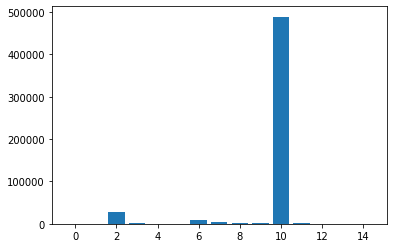

In [ ]:
from matplotlib import pyplot
for i in range(len(feat.scores_)):
	print('Feature %d: %f' % (i, feat.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(feat.scores_))], feat.scores_)
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report

### Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(random_state=4, criterion='gini', n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=4)

In [ ]:
pred = forest.predict(X_test)

In [ ]:
report = classification_report(y_test, pred)
print('Classification Report Random Forest - SMOTE Upsampling: \n', report)

Classification Report Random Forest - SMOTE Upsampling: 
               precision    recall  f1-score   support

       Fatal       0.23      0.04      0.06      4127
     Serious       0.28      0.08      0.13     39847
      Slight       0.87      0.97      0.92    273689

    accuracy                           0.85    317663
   macro avg       0.46      0.36      0.37    317663
weighted avg       0.79      0.85      0.81    317663



### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
print("Before")
print(y.value_counts())
print("After")
print(pd.Series(y_resampled).value_counts())

Before
Slight     1368445
Serious     199235
Fatal        20633
Name: Accident_Severity, dtype: int64
After
Slight     1094756
Serious    1094756
Fatal      1094756
Name: Accident_Severity, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)


In [ ]:
X_train.shape

(2627414, 15)

### SMOTE RF

In [ ]:
forest = RandomForestClassifier(random_state=4, criterion='gini', n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=4)

In [ ]:
pred = forest.predict(X_test)

In [ ]:
report = classification_report(y_test, pred)
print('Classification Report Random Forest - SMOTE Upsampling: \n', report)

Classification Report Random Forest - SMOTE Upsampling: 
               precision    recall  f1-score   support

       Fatal       0.96      0.98      0.97    219668
     Serious       0.94      0.83      0.88    218838
      Slight       0.87      0.95      0.91    218348

    accuracy                           0.92    656854
   macro avg       0.92      0.92      0.92    656854
weighted avg       0.92      0.92      0.92    656854



## Feature importance and Results

In [ ]:
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances

In [ ]:
def getFeatureImportance(model, X, y):
    viz = FeatureImportances(model, labels = list(df2.columns))
    viz.fit(X, y)

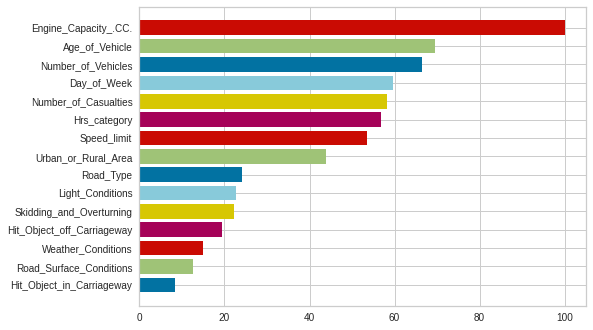

In [ ]:
getFeatureImportance(forest, X_resampled, y_resampled)

### Coorelation between the important features and severity\

Text(0.5, 1.0, 'Engine Capacity Mean for different accident severities')

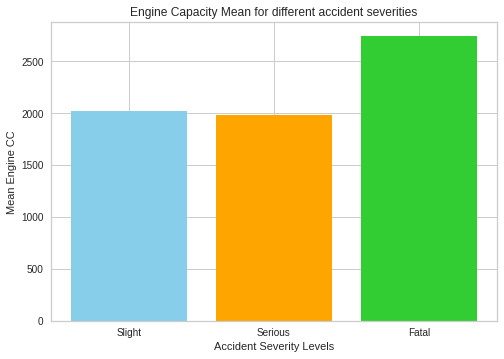

In [ ]:
arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[df2.loc[df2['Accident_Severity']==i,'Engine_Capacity_.CC.'].mean()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means=pd.DataFrame(data=d)
plt.bar(eng_means['Accident_Severity'],eng_means['Mean'],color=['SkyBlue','Orange','LimeGreen'])
plt.ylabel('Mean Engine CC')
plt.xlabel('Accident Severity Levels')
plt.title('Engine Capacity Mean for different accident severities')

Text(0.5, 1.0, 'Median Age of Vehicles vs accident severities')

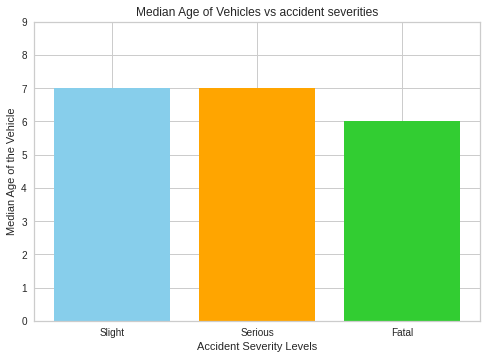

In [ ]:
arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[df2.loc[df2['Accident_Severity']==i,'Age_of_Vehicle'].median()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Median':arr}
eng_means=pd.DataFrame(data=d)
ax=plt.gca()
ax.set_ylim([0,9])
plt.bar(eng_means['Accident_Severity'],eng_means['Median'],color=['SkyBlue','Orange','LimeGreen'])
plt.ylabel('Median Age of the Vehicle')
plt.xlabel('Accident Severity Levels')
plt.title('Median Age of Vehicles vs accident severities')

Text(0.5, 1.0, 'Mean Speed Limit vs Accident severities')

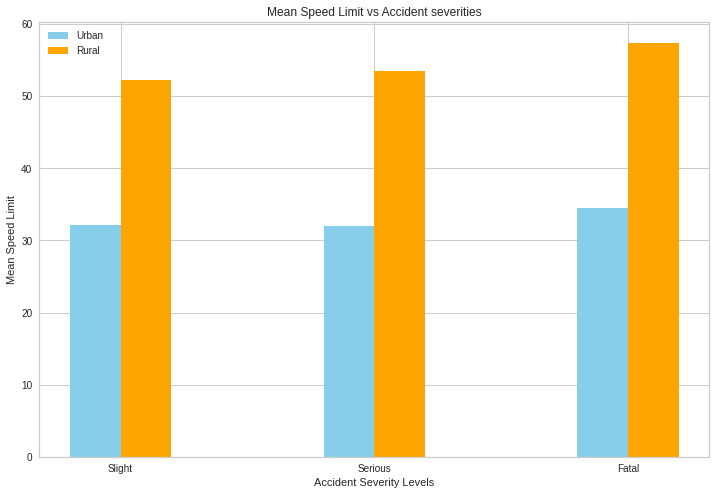

In [ ]:

arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[df2.loc[(df2['Accident_Severity']==i) & (df2['Urban_or_Rural_Area']=='Urban'),'Speed_limit'].mean()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_1=pd.DataFrame(data=d)
arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[df2.loc[(df2['Accident_Severity']==i) & (df2['Urban_or_Rural_Area']=='Rural'),'Speed_limit'].mean()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_2=pd.DataFrame(data=d)
pt_1=plt.figure(figsize=(12,8))
ax=plt.subplot(1,1,1)
ind=np.arange(3)
plt.bar(ind+0.2,eng_means_1['Mean'],width=0.2,color='SkyBlue',align='center',label='Urban')
plt.bar(ind+0.4,eng_means_2['Mean'],width=0.2,color='Orange',align='center',label='Rural')
ax.set_xticks(ind+0.3)
plt.ylabel('Mean Speed Limit')
ax.set_xticklabels( ('Slight','Serious','Fatal') )
plt.xlabel('Accident Severity Levels')
plt.legend()
plt.title('Mean Speed Limit vs Accident severities')

Text(0.5, 1.0, 'Percentage of accidents vs Accident severities')

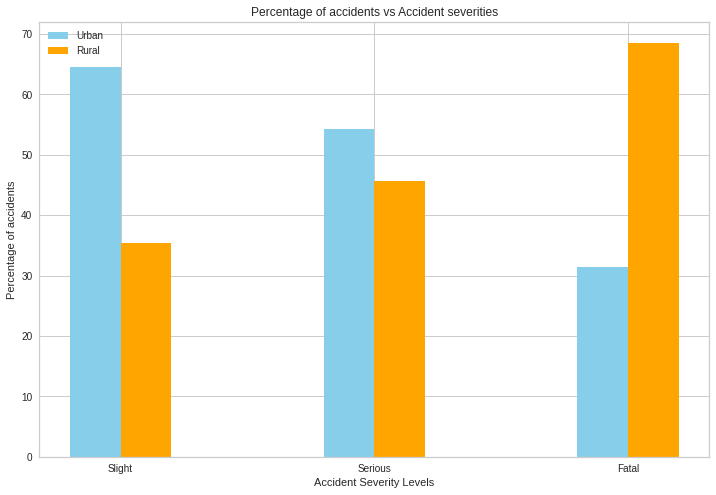

In [ ]:
arr=[]
for i in ['Slight','Serious','Fatal']:
  n=len(df2.loc[df2['Accident_Severity']==i,'Speed_limit'])
  arr+=[(len(df2.loc[(df2['Accident_Severity']==i) & (df2['Urban_or_Rural_Area']=='Urban'),'Speed_limit'])/n)*100]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_1=pd.DataFrame(data=d)
arr=[]
for i in ['Slight','Serious','Fatal']:
  n=len(df2.loc[df2['Accident_Severity']==i,'Speed_limit'])
  arr+=[(len(df2.loc[(df2['Accident_Severity']==i) & (df2['Urban_or_Rural_Area']=='Rural'),'Speed_limit'])/n)*100]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_2=pd.DataFrame(data=d)
pt_1=plt.figure(figsize=(12,8))
ax=plt.subplot(1,1,1)
ind=np.arange(3)
plt.bar(ind+0.2,eng_means_1['Mean'],width=0.2,color='SkyBlue',align='center',label='Urban')
plt.bar(ind+0.4,eng_means_2['Mean'],width=0.2,color='Orange',align='center',label='Rural')
ax.set_xticks(ind+0.3)
plt.ylabel('Percentage of accidents')
ax.set_xticklabels( ('Slight','Serious','Fatal') )
plt.xlabel('Accident Severity Levels')
plt.legend()
plt.title('Percentage of accidents vs Accident severities')

## SVM

In [ ]:
from sklearn.kernel_approximation import Nystroem
nys = Nystroem()
data = nys.fit_transform(X_train)

In [ ]:
from sklearn.svm import LinearSVC
sgd = LinearSVC()
model = sgd.fit(data, y_train)

In [ ]:
test = nys.fit_transform(X_test)
pred = model.predict(test)

In [ ]:
report = classification_report(y_test, pred)
print('SVM: \n', report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM: 
               precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00      4127
     Serious       0.10      0.00      0.00     39847
      Slight       0.86      1.00      0.93    273689

    accuracy                           0.86    317663
   macro avg       0.32      0.33      0.31    317663
weighted avg       0.75      0.86      0.80    317663



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter tuning SVM

In [ ]:
# parameters = {
#     "C":np.arange(1, 3.05, 0.05),
#     "tol":[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
#     "class_weight":[None, "balanced"],
#     "loss" : ['hinge', 'squared_hinge'],
# }

# scores = ["f1", "balanced_accuracy"]

# classifier = GridSearchCV(
#     LinearSVC(random_state=0),
#     param_grid=parameters,
#     scoring=scores,
#     refit="f1",
#     verbose=1,
#     n_jobs=-1
# )

# classifier.fit(X_train, y_train)